# project_1
### by  Alhanouf Saud Makki  431000020  &  Shatha Fahad Aluneizi   431000375  
                                           

# Apriori Algorithm (Association Rule Mining)

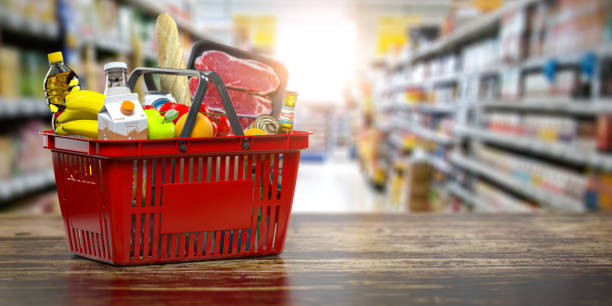

## Introduction

What is MBA?


Market Basket Analysis (MBA) is a technique that helps retailers identify the patterns of purchases that occur when various items are bought together. It uses statistical concepts such as support, confidence, lift to generate rules that can be used to interpret the purchase/shopping behavior, 



## Association Rules

Apriori Algorithm is an algorithm for extracting the frequent item-sets with application in association rule learning. In general, the apriori algorithm has been developed to work on databases containing large number of transactions. For instance, purchases by customers of a store. The item-set is considered as ‘frequent’ if it meets a user-specified support threshold. For example, if the support threshold is set to 0.4, this indicates that a frequent item-set which is defined as a set of items that found together in at least 40% of all transactions in the database. 



Association rules analysis can reveal how items are related to each other.  

## Measure 1: Support. 
This measure shows the popularity of an itemset using the proportion of transactions in which an itemset occurs. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also includes multiple items. For example, the support of {apple, juice, rice} is 2 out of 8, or 25%.

$supp(X⇒Y)=(|X∪Y|)/(n)$



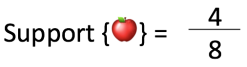


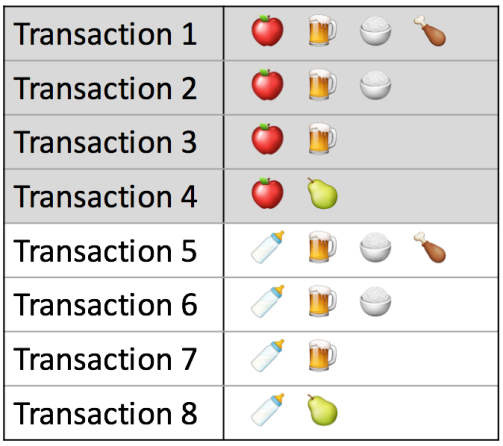

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

## Measure 2: Confidence. 

This measure shows how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

$conf(X⇒Y)=(supp(X∪Y))/(supp(X))$

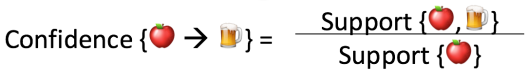

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

## Measure 3: Lift. 

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

$lift(X⇒Y)=(supp(X∪Y))/(supp(X)supp(Y))$

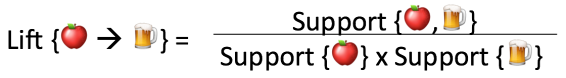

## Note: You are required to work with Numpy


Consider the following dataset, which includes a database from a store with (9834) transactions of different customers buying different items from that store. Write a python program that explore the correlations between the different items in the store. Therefore, you can predict if one customer is buying banana, mango, and apple, then what is the next item the customer would be interested in.  You are required to implement the Apriori Algorithm in order to find out the frequent item-sets which are most likely to be purchased by customers. 



<div class="alert alert-block alert-danger">
<b>Just don't:</b> call the already made apriori function (from mlxtend.frequent_patterns import apriori)
</div>

## Algorithm Pseduo Code



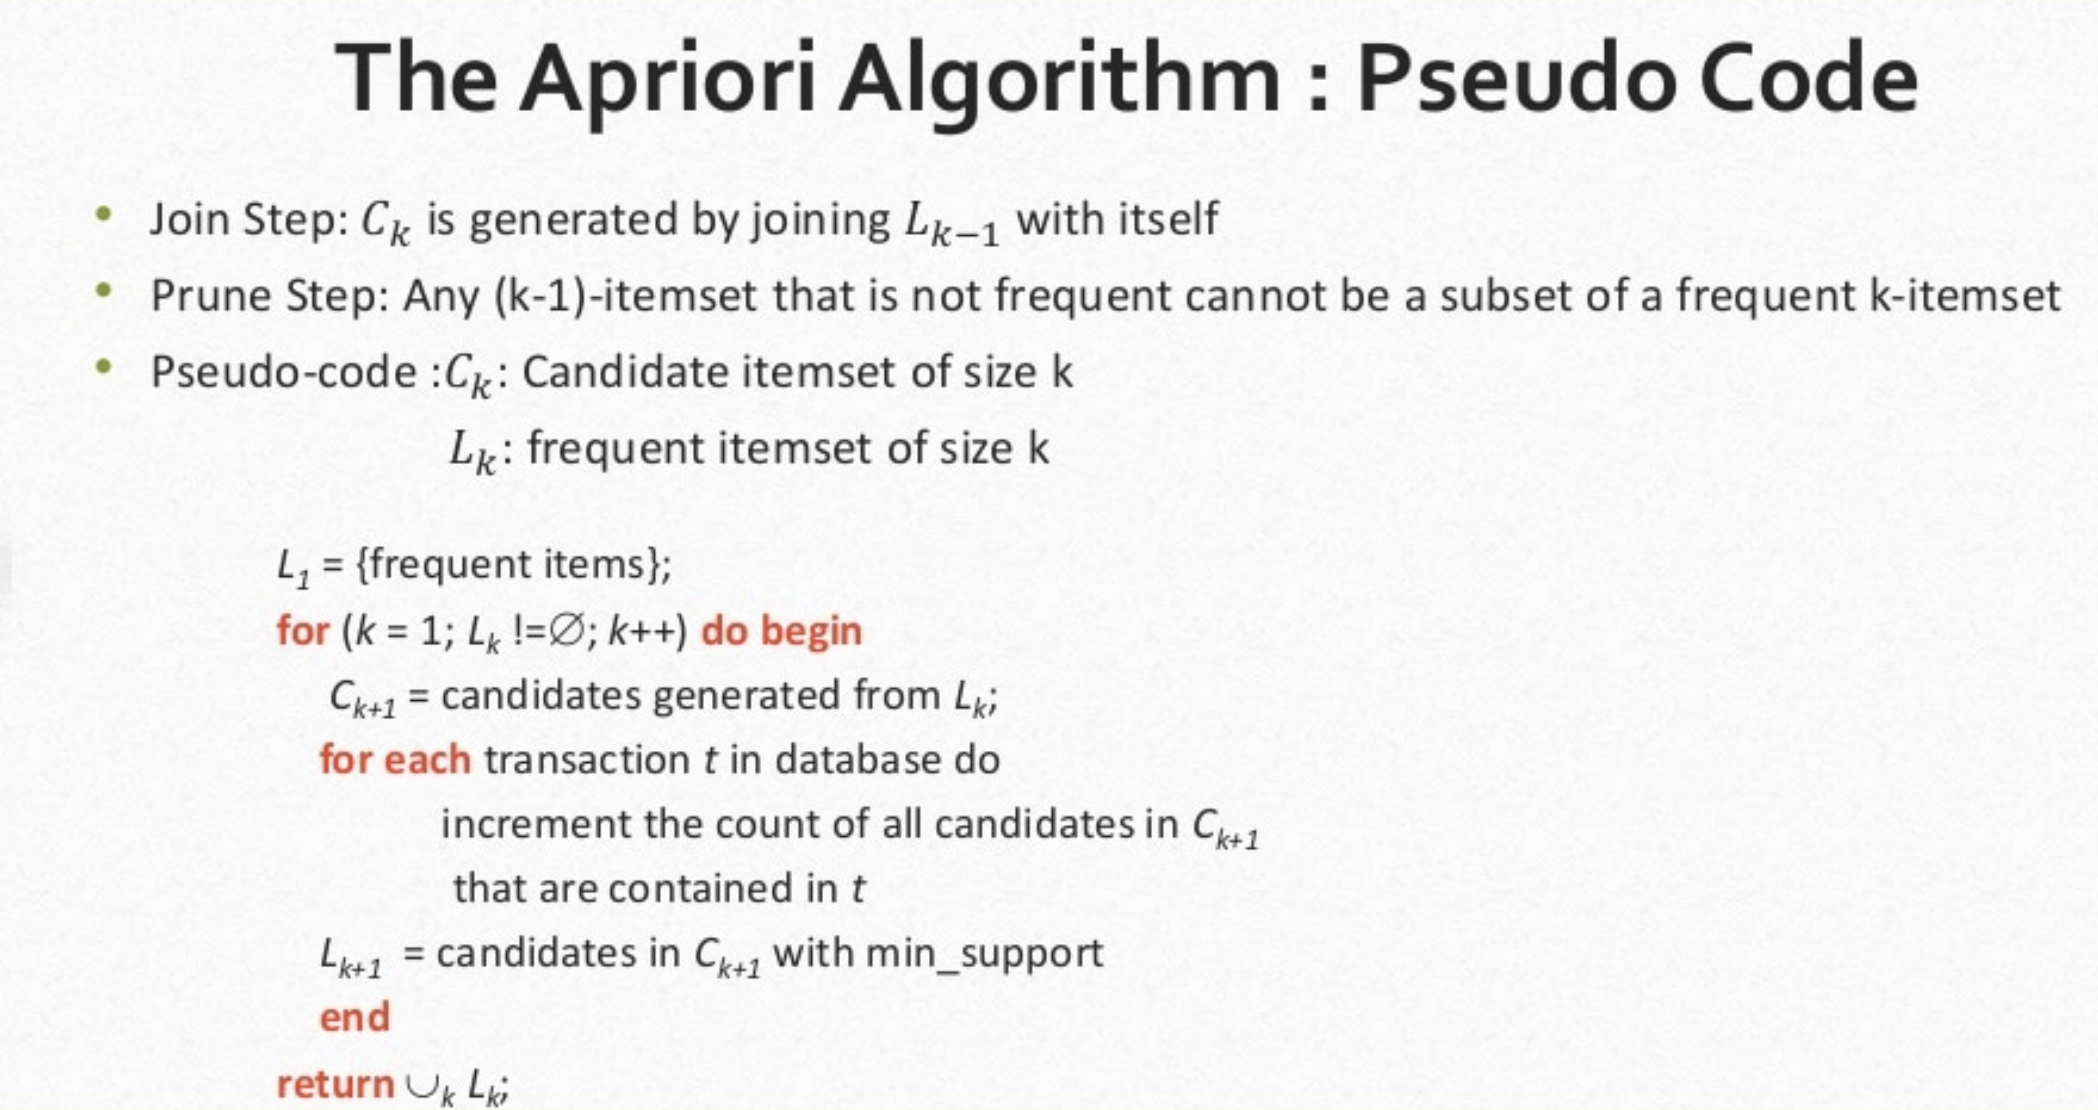



To sum up, the basic components of Apriori can be written as
- Use k-1 itemsets to generate k itemsets
- Getting C[k] by joining L[k-1] and L[k-1]
- Prune C[k] with subset testing
- Generate L[k] by extracting the itemsets in C[k] that satisfy minSup

Simulate the algorithm in your head and validate it at the end.

Helpful video https://youtu.be/guVvtZ7ZClw 

more information:

https://morioh.com/p/9b53cedbd235

https://www.slideshare.net/INSOFE/apriori-algorithm-36054672

## Import Important Libraries

In [21]:
import pandas as pd
import numpy as np
from itertools import permutations, combinations, chain
from functools import reduce

## Import The dataset

In [22]:
dataset = pd.read_csv('groceriesList.csv', header=None)
dataset.tail()

0               1                 2               3   \
9830              sausage         chicken              beef  hamburger meat   
9831    cooking chocolate             NaN               NaN             NaN   
9832              chicken    citrus fruit  other vegetables          butter   
9833  semi-finished bread   bottled water              soda    bottled beer   
9834              chicken  tropical fruit  other vegetables         vinegar   

                 4               5                6           7       8   \
9830   citrus fruit          grapes  root vegetables  whole milk  butter   
9831            NaN             NaN              NaN         NaN     NaN   
9832         yogurt  frozen dessert    domestic eggs  rolls/buns     rum   
9833            NaN             NaN              NaN         NaN     NaN   
9834  shopping bags             NaN              NaN         NaN     NaN   

                      9   ...   22   23   24   25   26   27   28   29   30  \
9830  whipped/sour cream  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9831                 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9832     cling film/bags  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9833                 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9834                 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       31  
9830  NaN  
9831  NaN  
9832  NaN  
9833  NaN  
9834  NaN  

[5 rows x 32 columns]

In [23]:
def convert_dataset_to_list(dataset):
    
    dataset_as_list = []
    for i, row in dataset.iterrows():
        clean_row = []
        for value in row:
            if type(value)==str:
                clean_row.append(value)
            elif np.isnan(value):
                break
        dataset_as_list.append(clean_row)
    return dataset_as_list

In [24]:
def is_subset(row, itemset):
  
    result = True
    for i in itemset:
        if i not in row:
            result = False
            break
    return result

In [25]:
def generate_subsets(itemset):
    
    all_subsets = []
    for i in range(1, len(itemset)):
        all_subsets += list(combinations(itemset, i))
    return all_subsets

In [26]:
def calc_support(dataset_as_list, itemset):
    
    count = 0
    for row in dataset_as_list:
        if is_subset(row, itemset):
            count += 1
    support = count / len(dataset_as_list)
    return support

In [27]:
def calc_confidence(dataset_as_list, a, b):
    
    return calc_support(dataset_as_list, a+b) / calc_support(dataset_as_list, a)

In [28]:
def calc_lift(dataset_as_list, a, b):
    
    return calc_support(dataset_as_list, a+b) / (calc_support(dataset_as_list, a) * calc_support(dataset_as_list, b))

In [29]:
def get_all_unique_items(dataset_as_list):
    
    unique_items = set()
    for row in dataset_as_list:
        unique_items.update(row)
    return sorted(unique_items)

In [30]:
def get_C1(dataset_as_list):
    
    unique_items = get_all_unique_items(dataset_as_list)
    C1 = dict()
    for item in unique_items:
        C1[(item,)] = calc_support(dataset_as_list, (item,))
    return C1

In [31]:
def filter_C(dataset_as_list, C, min_support):
    
    L = dict()
    for (itemset, support) in C.items():
        if support >= min_support:
            L[itemset] = support
    return L

In [32]:
def get_next_C(dataset_as_list, L):
    
    C = dict()
    comb = list(combinations(L.keys(), 2))
    n = len(comb)
    for i, (s1, s2) in enumerate(comb):
        itemset = sorted(set(s1+s2))
        itemset = tuple(itemset)
        if itemset in C:
            continue
        support = calc_support(dataset_as_list, itemset)
        C[itemset] = support
        
    print()
    return C

In [33]:
def apriori_algorithm(dataset, max_n_levels, min_support):
    
    dataset_as_list = convert_dataset_to_list(dataset)
    print('Calculating C1, L1')
    n_levels = 1
    C = get_C1(dataset_as_list)
    L = filter_C(dataset_as_list, C, min_support)
    while n_levels != max_n_levels:
        n_levels += 1
        print(f'Calculating C{n_levels}, L{n_levels}')
        C = get_next_C(dataset_as_list, L)
        next_L = filter_C(dataset_as_list, C, min_support)
        if next_L:
            L = next_L
        else:
            break
    return L

In [34]:
def assoc_rules(dataset, L, max_n_rules=5000):
    
    dataset_as_list = convert_dataset_to_list(dataset)
    n_rules = 0
    for (itemset, support) in L.items():
        subsets = generate_subsets(itemset)
        for s in subsets:
            s2 = set(itemset) - set(s)
            s_2 = tuple(sorted(s2))
            confidence = calc_confidence(dataset_as_list, s, s_2)
            lift = calc_lift(dataset_as_list, s, s_2)
           
            
            print(f'{set(s)} -> {set(s2)}')
            print(f' Support: {support:.2f}')
            print(f' Confidence: {confidence:.2f}')
            print(f' Lift: {lift:.2f}')
            
            print('-------------------------------------')
            n_rules += 1
            if n_rules == max_n_rules:
                return

In [36]:
L = apriori_algorithm(dataset, max_n_levels=5, min_support=0.001)

Calculating C1, L1
Calculating C2, L2

Calculating C3, L3

Calculating C4, L4

Calculating C5, L5



In [37]:
assoc_rules(dataset, L)

{'beef'} -> {'whole milk', 'butter', 'root vegetables', 'other vegetables'}
 Support: 0.00
 Confidence: 0.02
 Lift: 4.65
-------------------------------------
{'butter'} -> {'whole milk', 'beef', 'root vegetables', 'other vegetables'}
 Support: 0.00
 Confidence: 0.02
 Lift: 4.63
-------------------------------------
{'other vegetables'} -> {'whole milk', 'butter', 'beef', 'root vegetables'}
 Support: 0.00
 Confidence: 0.01
 Lift: 2.58
-------------------------------------
{'root vegetables'} -> {'whole milk', 'butter', 'beef', 'other vegetables'}
 Support: 0.00
 Confidence: 0.01
 Lift: 5.10
-------------------------------------
{'whole milk'} -> {'butter', 'beef', 'root vegetables', 'other vegetables'}
 Support: 0.00
 Confidence: 0.00
 Lift: 2.80
-------------------------------------
{'butter', 'beef'} -> {'whole milk', 'root vegetables', 'other vegetables'}
 Support: 0.00
 Confidence: 0.18
 Lift: 7.57
-------------------------------------
{'beef', 'other vegetables'} -> {'whole milk',